<a href="https://colab.research.google.com/github/tommyEzreal/study_low_level/blob/main/NLP/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%EB%94%A5%EB%9F%AC%EB%8B%9D2/chapter01/neuralnet_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [103]:
! git clone https://github.com/WegraLee/deep-learning-from-scratch-2


Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 606 (delta 259), reused 247 (delta 247), pack-reused 305
Receiving objects: 100% (606/606), 29.81 MiB | 31.02 MiB/s, done.
Resolving deltas: 100% (374/374), done.


## basic manipulation review

In [3]:
# element wise 

W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + X , W*X

(array([[ 1,  3,  5],
        [ 7,  9, 11]]), array([[ 0,  2,  6],
        [12, 20, 30]]))

In [6]:
# broadcast
A = np.array([[1,2],[3,4]])
print(A * 10)

b = np.array([10,20])
print(A * b)

[[10 20]
 [30 40]]
[[10 40]
 [30 80]]


In [7]:
# dot product
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [9]:
# neural net inference

W1 = np.random.rand(2,4)
b1 = np.random.rand(4)
x = np.random.randn(10,2)
h = np.matmul(x,W1) + b1
h

array([[-0.44402825, -0.57930786,  0.27810455, -0.05472757],
       [ 0.84240081,  0.72922745,  1.37604043,  0.69669967],
       [-0.37816797, -0.29327506, -0.48277843,  0.19384485],
       [ 1.21175838,  1.34045907,  0.81268623,  1.13836393],
       [-1.40123861, -1.60353368, -0.3502215 , -0.66235508],
       [ 0.96117443,  0.82539323,  1.56935905,  0.74243456],
       [ 0.71206569,  0.64677873,  1.07781592,  0.66864906],
       [ 0.20366046,  0.00757938,  1.09921885,  0.25460338],
       [ 1.6164306 ,  1.57404809,  1.82220046,  1.20396867],
       [ 0.90982309,  0.74978596,  1.61272269,  0.6900196 ]])

In [10]:
print(W1)
print(b1)
print(x)

[[0.80773862 0.94663896 0.22302005 0.59173343]
 [0.75279038 0.71811673 0.82008806 0.39405202]]
[0.37135797 0.31298945 0.73938191 0.4818873 ]
[[-0.64999839 -0.3857082 ]
 [-0.18800457  0.82745664]
 [ 0.61746225 -1.65819608]
 [ 1.28206633 -0.25926749]
 [-1.28089911 -0.98030598]
 [-0.28531642  1.08964935]
 [ 0.04982608  0.39913007]
 [-0.82585277  0.66336616]
 [ 0.41642374  1.20712367]
 [-0.43648306  1.1836354 ]]


Sigomid

In [27]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [28]:
# activation func 
a = sigmoid(h)
print(a)

[[0.39078154 0.35909187 0.56908147 0.48632152]
 [0.69897061 0.67463572 0.79835432 0.66745564]
 [0.40656884 0.42720227 0.38159625 0.54831003]
 [0.77060993 0.79256542 0.69268163 0.75737913]
 [0.19761964 0.16748831 0.41332871 0.34021078]
 [0.72335688 0.69537997 0.82769222 0.677528  ]
 [0.67085744 0.65628419 0.74608044 0.6612006 ]
 [0.55073986 0.50189483 0.75011371 0.56330922]
 [0.83430228 0.82835993 0.86082996 0.76923004]
 [0.71296396 0.67913206 0.83378905 0.66597129]]


layer and propagation

In [29]:
# class with layer , Affine & Sigmoid 

# simple rule : 
# "All have forward() and backward()"
# "All have instance params:[], grads:[]"

# Sigmoid
class Sigmoid:
  def __init__(self):
    self.params=[]

  def forward(self, x): # forward propagation 
    return 1 / (1+np.exp(-x))

# Affine Layer
class Affine:
  def __init__(self, W, b):
    self.params = [W,b] 

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x,W) + b
    return out

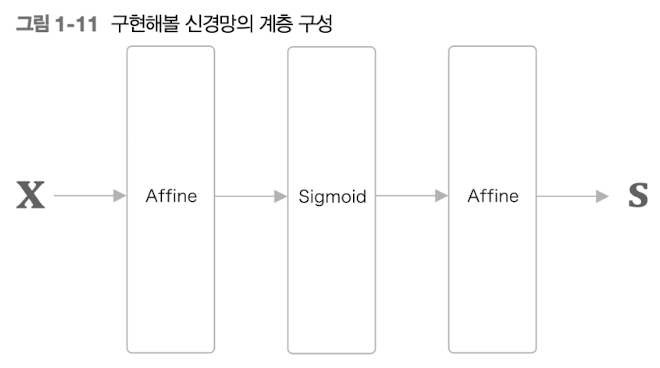

In [82]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    W1 = np.random.randn(I,H) 
    b1 = np.random.randn(H) 
    W2 = np.random.randn(H,O) 
    b2 = np.random.randn(O)

    self.layers = [
        Affine(W1,b1), 
        Sigmoid(), 
        Affine(W2,b2)
        ] 


    self.params = [layer.params for layer in self.layers]
    # self.params = []
    # for layer in self.layers:
    #   self.params += layer.params # all weights saved in list by layer

  
  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x) # 각 레이어에서 정의한 forward 통과하도록 

    return x



In [83]:
x = np.random.rand(10,2)
model = TwoLayerNet(2,4,3) # (input, hidd, output)
s = model.predict(x)

In [84]:
print(x.shape)
print(s.shape)
print(s)

# (10,2) * (2,4) -> (10,4) * (4,3) -> (10,3)

(10, 2)
(10, 3)
[[-2.69674638  1.85548486 -0.70461105]
 [-2.61177221  1.77611442 -0.52565983]
 [-2.70937713  1.8154859  -0.83140032]
 [-2.5891778   1.63498353 -0.69892613]
 [-2.78926226  1.97990423 -0.83842557]
 [-2.56354422  1.68721093 -0.481413  ]
 [-2.72724035  1.79775821 -0.9439032 ]
 [-2.60458274  1.73437086 -0.56827194]
 [-2.72015575  1.78499837 -0.93971586]
 [-2.54427596  1.61737061 -0.53023365]]


train neural net

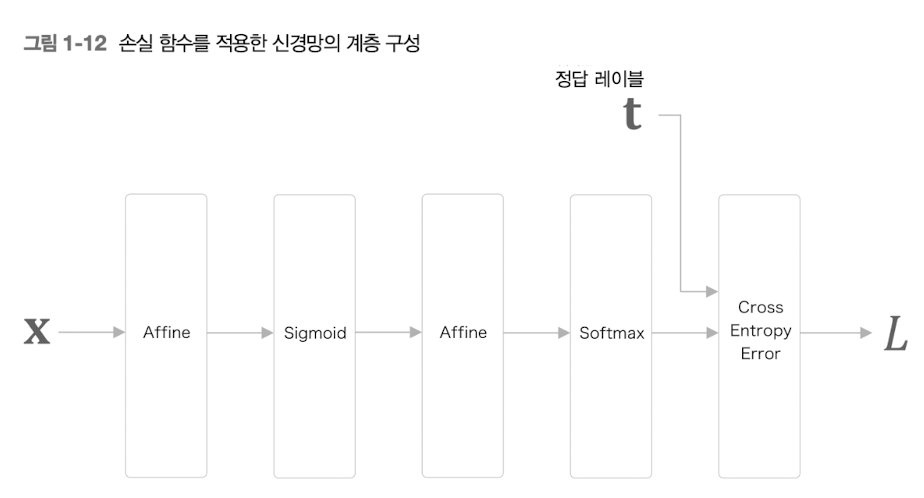

- loss function = 학습이 얼마나 잘 되어가고 있는지를 알 수 있는 '척도'
- common/ layers.py 

계산 그래프

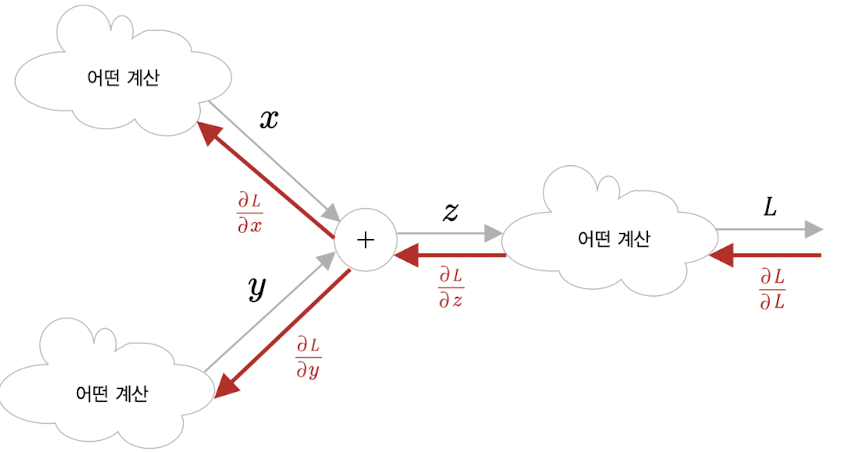

repeat node

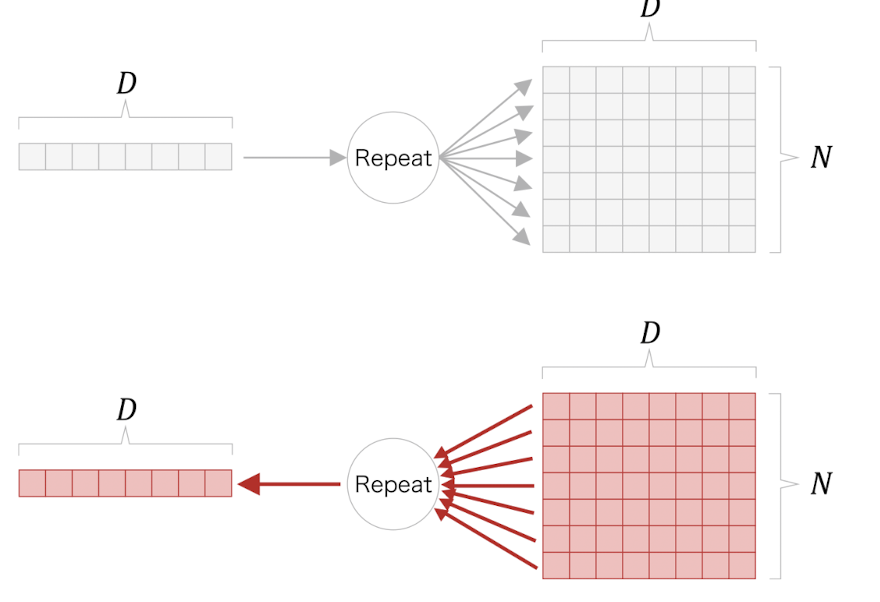

In [90]:
# repeat node
D, N = 8,7
x = np.random.randn(1,D)
y = np.repeat(x,N, axis=0) # repeat = 원소 복제, 행방향 

dy = np.random.randn(N,D)
dx = np.sum(dy, axis=0, keepdims=True) # keepdims : 2차원배열 차원수 유지 


In [95]:
print(x.shape, y.shape)
print(x)
print(y)

(1, 8) (7, 8)
[[ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]]
[[ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]
 [ 1.79597617  0.05769367 -0.48772414 -0.55148915 -0.31093099  1.25034749
  -0.350281   -0.51515651]]


In [98]:
dy.shape, dx.shape

((7, 8), (1, 8))

In [ ]:
# sum node
D, N = 8,7
x = np.random.randn(N,D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1,D)
dx = np.repeat(dy,N,axis=0)

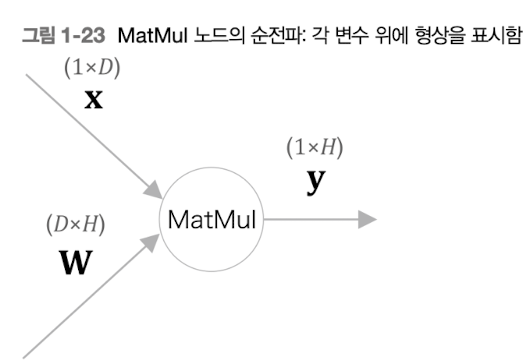

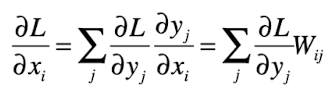

여기서 x에대한 L의 미분값은 y에대한 L의 미분과 W의 내적 

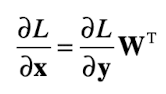

shape을 확인해보면   
Y미분(1,H) * WT(H,D) = x미분(1,D)


배치를 고려한다면 다음과 같은 그림으로 나타낼수 있음
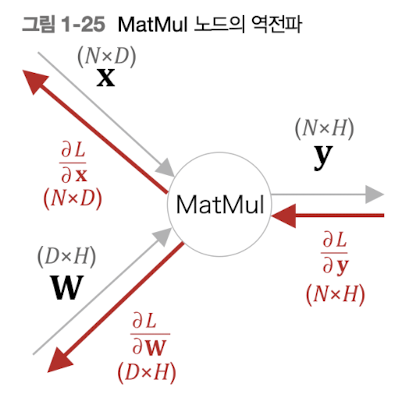

In [99]:
# matmul node

class Matmul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self,x):
        W, = self.params
        out = np.matmul(x,W)
        self.x = x
        return out
    
    def backward(self, dout): # dout = grad out 
        W, = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW #생략기호 -> 메모리차이 / 깊은복사 
        return dx


기울기 도출과 역전파 구현 
- sigmoid 의 미분 
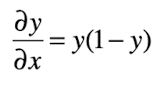

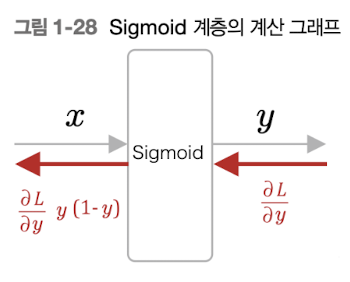

In [100]:
# Sigmoid 역전파 계층

class Sigmoid:
    def __init__(self):
        self.params, self.grads=[],[]
        self.out = None
    
    def forward(self,x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # y(1-y)
        return dx


Affine계층의 계산그래프 
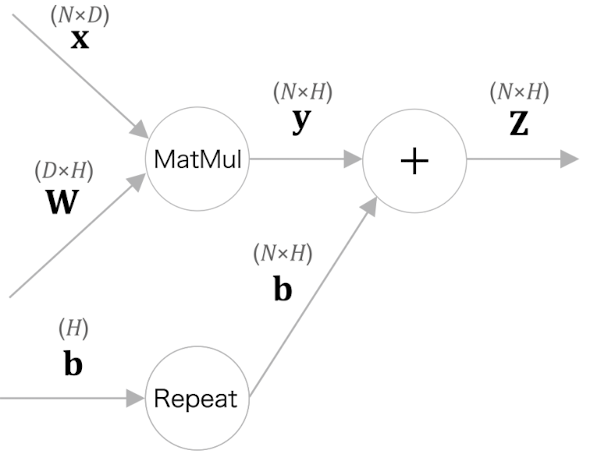

In [101]:
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self,x):
        W,b = self.params
        out = np.matmul(x,W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

Sofmax with Loss 계층
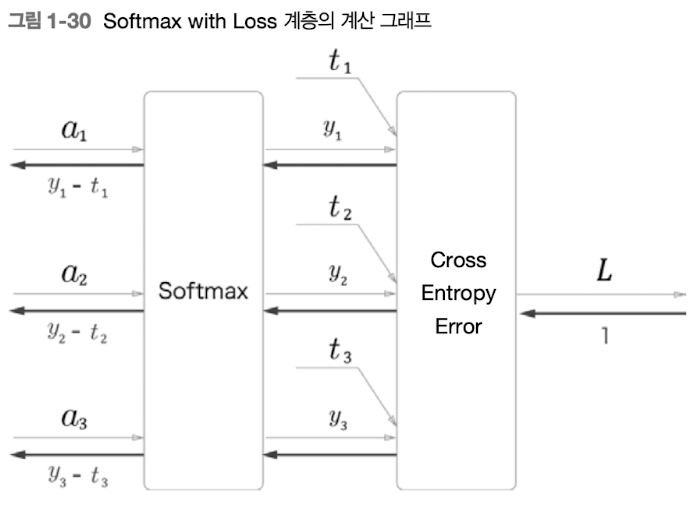

In [88]:
# functions
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [89]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx



기울기는 현재의 가중치 매개변수에서 손실을 가장 크게 하는 방향을 가리키기 때문에, 매개변수를 그 기울기와 반대 방향으로 갱신 -> Gradient Descent

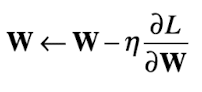

In [ ]:
# optimizer 

class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

## 신경망으로 문제 풀기

In [108]:
%cd /content/deep-learning-from-scratch-2

/content/deep-learning-from-scratch-2


In [112]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt 

x,t = spiral.load_data() # on-hot vec 't' / 정답 label
print('x', x.shape)
print('y', y.shape)

x (300, 2)
y (7, 8)


신경망 구현

In [114]:
import sys
sys.path.append('..')
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)

        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)

        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ] 

        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score,t)
        return loss

    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


In [122]:
# train loop

import sys
sys.path.append('..')
from common.optimizer import SGD
import matplotlib
matplotlib.rc('font', family='AppleGothic')

# hyperparams
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# load data
x,t = spiral.load_data()

# model, optim
model = TwoLayerNet(input_size=2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

data_size = len(x)
max_iters = data_size // batch_size

total_loss = 0
loss_count = 0
loss_list = []

# loop
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size) # shuffle data / 0-datasize까지 무작위 순서 생성 
    x = x[idx] # ex: [7,6,8,3,5,0,4,1,2,9] 
    t = t[idx]
    # epoch 단위로 데이터를 섞고 앞에서부터 순서대로 뽑아내어 사용 
    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters+1)*batch_size]
        batch_t = t[iters * batch_size : (iters+1)*batch_size]
        
        # get grad and update 
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads) # step

        total_loss += loss
        loss_count +=1

        if (iters+1) % 10 ==0:
            avg_loss = total_loss / loss_count
            print('epoch: %d | iters: %d / %d | loss %.2f'
                    % (epoch +1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0


epoch: 1 | iters: 10 / 10 | loss 1.13
epoch: 2 | iters: 10 / 10 | loss 1.13
epoch: 3 | iters: 10 / 10 | loss 1.12
epoch: 4 | iters: 10 / 10 | loss 1.12
epoch: 5 | iters: 10 / 10 | loss 1.11
epoch: 6 | iters: 10 / 10 | loss 1.14
epoch: 7 | iters: 10 / 10 | loss 1.16
epoch: 8 | iters: 10 / 10 | loss 1.11
epoch: 9 | iters: 10 / 10 | loss 1.12
epoch: 10 | iters: 10 / 10 | loss 1.13
epoch: 11 | iters: 10 / 10 | loss 1.12
epoch: 12 | iters: 10 / 10 | loss 1.11
epoch: 13 | iters: 10 / 10 | loss 1.09
epoch: 14 | iters: 10 / 10 | loss 1.08
epoch: 15 | iters: 10 / 10 | loss 1.04
epoch: 16 | iters: 10 / 10 | loss 1.03
epoch: 17 | iters: 10 / 10 | loss 0.96
epoch: 18 | iters: 10 / 10 | loss 0.92
epoch: 19 | iters: 10 / 10 | loss 0.92
epoch: 20 | iters: 10 / 10 | loss 0.87
epoch: 21 | iters: 10 / 10 | loss 0.85
epoch: 22 | iters: 10 / 10 | loss 0.82
epoch: 23 | iters: 10 / 10 | loss 0.79
epoch: 24 | iters: 10 / 10 | loss 0.78
epoch: 25 | iters: 10 / 10 | loss 0.82
epoch: 26 | iters: 10 / 10 | loss 

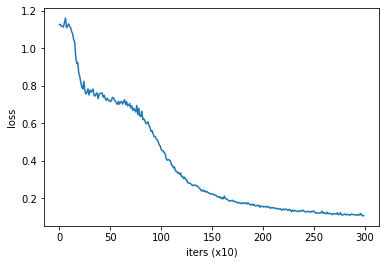

In [124]:
# 학습 결과 
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iters (x10)')
plt.ylabel('loss')
plt.show()

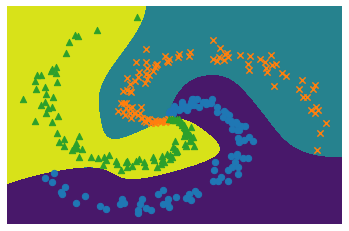

In [125]:
# 경계 영역
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

Use Trainer class! 

In [127]:
%run /content/deep-learning-from-scratch-2/common/trainer.py

<Figure size 432x288 with 0 Axes>

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


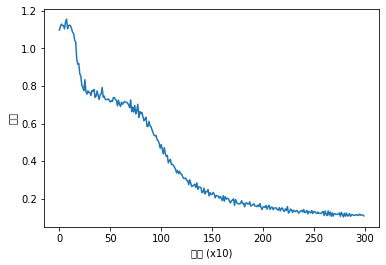

In [129]:
# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

